<a href="https://colab.research.google.com/github/thedatadj/computer-vision/blob/main/human_horse_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I create an image classifier for humans and horses.

# The dataset
The dataset consist of computer generated images of horses and humans.

In [ ]:
# Download the file
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

import os
import zipfile

# Extract the file's content
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

Let's see a couple of images.

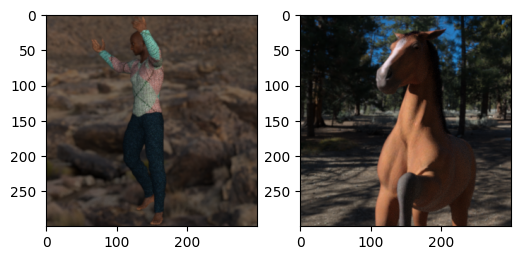

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image1 = mpimg.imread('/tmp/horse-or-human/humans/human04-02.png')
image2 = mpimg.imread('/tmp/horse-or-human/horses/horse48-7.png')
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)

## Preprocess the data
Set up a data generator that:
* Normalize the images
* Label the images

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
    "/tmp/horse-or-human/",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.


# Modeling
Convolutional neural network model.

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'), MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'), MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'), MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'), MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')]
)

In [12]:
from tensorflow.keras.optimizers import RMSprop

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
# Training
model.fit(train_generator, steps_per_epoch=8, epochs=15)

Epoch 1/15
8/8 [==============================] - 94s 11s/step - loss: 0.7786 - accuracy: 0.5284
Epoch 2/15
8/8 [==============================] - 94s 12s/step - loss: 0.6920 - accuracy: 0.4939
Epoch 3/15
8/8 [==============================] - 89s 11s/step - loss: 0.6293 - accuracy: 0.6874
Epoch 4/15
8/8 [==============================] - 88s 11s/step - loss: 0.5421 - accuracy: 0.7931
Epoch 5/15
8/8 [==============================] - 88s 13s/step - loss: 1.1397 - accuracy: 0.8554
Epoch 6/15
8/8 [==============================] - 89s 13s/step - loss: 0.2049 - accuracy: 0.9210
Epoch 7/15
8/8 [==============================] - 101s 12s/step - loss: 0.2999 - accuracy: 0.9088
Epoch 8/15
8/8 [==============================] - 89s 13s/step - loss: 0.2478 - accuracy: 0.9143
Epoch 9/15
8/8 [==============================] - 89s 11s/step - loss: 0.1178 - accuracy: 0.9488
Epoch 10/15
8/8 [==============================] - 89s 11s/step - loss: 0.0636 - accuracy: 0.9755
Epoch 11/15
8/8 [===========

# Demostration

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse.jpg to horse.jpg
1/1 [==============================] - 0s 164ms/step
[0.]
horse.jpg is a horse
